Importing required modules:

In [ ]:
import json
import random
import string
import json
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

Data Generation:
This code generates a synthetic dataset of emails with features and labels (spam/not spam).



In [ ]:
import random
import string
import json

def generate_random_text(length):
    return ''.join(random.choices(string.ascii_letters + string.digits + ' ', k=length))

def generate_random_header():
    return {
        "from": f"user{random.randint(1, 1000)}@example.com",
        "to": f"recipient{random.randint(1, 1000)}@example.com",
        "subject": generate_random_text(20),
    }

def calculate_sender_reputation(sender):
    # Simulate sender reputation with a random score (0: bad, 1: good)
    return round(random.uniform(0, 1), 2)

def detect_suspicious_links(content):
    # Randomly simulate the presence of suspicious links (0 or 1)
    return random.choice([0, 1])

def calculate_word_to_character_ratio(content):
    words = content.split()
    return round(len(words) / len(content), 2) if content else 0

def generate_statistical_features(content):
    words = content.split()
    return {
        "spam_keyword_count": sum(1 for word in words if word.lower() in ["win", "free", "prize", "click"]),
    }

def generate_dataset(num_entries):
    dataset = []
    for _ in range(num_entries):
        content = generate_random_text(200)
        header = generate_random_header()
        sender_reputation = calculate_sender_reputation(header["from"])
        suspicious_links = detect_suspicious_links(content)
        word_to_character_ratio = calculate_word_to_character_ratio(content)
        statistical = generate_statistical_features(content)

        dataset.append({
            "header": header,
            "sender_reputation": sender_reputation,
            "suspicious_links": suspicious_links,
            "word_to_character_ratio": word_to_character_ratio,
            **statistical,
            "label": random.choice(["spam", "not_spam"])
        })

    return dataset

def main():
    num_entries = 100  # Number of entries in the dataset
    dataset = generate_dataset(num_entries)

    with open("Dataset2.json", "w") as json_file:
        json.dump(dataset, json_file, indent=4)

    print(json.dumps(dataset, indent=4))

if __name__ == "__main__":
    main()


[
    {
        "header": {
            "from": "user157@example.com",
            "to": "recipient849@example.com",
            "subject": "KPbQmfAtY9FToI1OjCXi"
        },
        "sender_reputation": 0.92,
        "suspicious_links": 1,
        "word_to_character_ratio": 0.02,
        "spam_keyword_count": 0,
        "label": "spam"
    },
    {
        "header": {
            "from": "user28@example.com",
            "to": "recipient863@example.com",
            "subject": "HEgHrKJkmx2FFXPvzs2X"
        },
        "sender_reputation": 0.51,
        "suspicious_links": 1,
        "word_to_character_ratio": 0.01,
        "spam_keyword_count": 0,
        "label": "not_spam"
    },
    {
        "header": {
            "from": "user704@example.com",
            "to": "recipient258@example.com",
            "subject": "msRrtx3stnaaSa4fdmPs"
        },
        "sender_reputation": 0.64,
        "suspicious_links": 1,
        "word_to_character_ratio": 0.03,
        "spam_keyword_count": 

Data Loading:
 This code snippet uploads and loads the JSON dataset into a pandas DataFrame.

In [ ]:
# Step 1: Upload your JSON file to Colab
from google.colab import files
import pandas as pd
import json

# Upload the JSON file
uploaded = files.upload()

# Load the uploaded JSON file
file_name = list(uploaded.keys())[0]
with open(file_name, 'r') as file:
    data = json.load(file)

# Convert JSON data to a DataFrame
df = pd.DataFrame(data)
print(df.head())  # Display the first few rows

Saving Dataset2.json to Dataset2 (1).json
                                             content  \
0  MhXBxaYrNqNtNKeNlEZyCHdbxtDMlwvAoV6oGfXxQzACbs...   
1  k hspt2DKnqQYWSBMXQdKz FhA60ZxZZP4yqdP58oiP37F...   
2  XbAeUeQYPzWe8GOIJwEp Vtf8I 0JtQjdNkX9MrqmeXZ0O...   
3  s8i1J Xkq70xujnGOsrJBsLrFhcdnaF3cRujqcraSNPb5E...   
4  iTqCschRsvlp3wUqkVf84H dpVsOUhEHCXOVuV3uNsVcg8...   

                                              header  \
0  {'from': 'user643@example.com', 'to': 'recipie...   
1  {'from': 'user729@example.com', 'to': 'recipie...   
2  {'from': 'user782@example.com', 'to': 'recipie...   
3  {'from': 'user591@example.com', 'to': 'recipie...   
4  {'from': 'user918@example.com', 'to': 'recipie...   

                                 behavioral  \
0   {'click_rate': 0.4, 'reply_rate': 0.64}   
1  {'click_rate': 0.28, 'reply_rate': 0.63}   
2  {'click_rate': 0.92, 'reply_rate': 0.56}   
3  {'click_rate': 0.95, 'reply_rate': 0.23}   
4  {'click_rate': 0.17, 'reply_rate': 0.54}   

 

Data loading and display:
This code loads the JSON file, converts it into a pandas DataFrame, and prints the first few rows.

In [ ]:
def load_and_print_table(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    df = pd.json_normalize(data)
    print("Data in table form:")
    print(df.head())
    return df

Data Cleaning: This snippet cleans the data by handling missing values and converting categorical features

In [ ]:
# 2. Clean the data
def clean_data(df):
    # Drop rows with missing values
    df = df.dropna()
    # Convert categorical variables to numerical using one-hot encoding
    df = pd.get_dummies(df, drop_first=True)
    return df

Data Standardization: This snipper standardizes the numerical features using StandardScalar

In [ ]:
def stand_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

Model Training: This snippet trains a RandomForestClassifier model on the training data.

In [ ]:
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

Model Evaluation: This code snippet evaluates the model's performance and prints the accuracy.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    return y_pred

Confusion matric visualization: This code visualizes the model;s performance using a confusion matrix heatmap.

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Feature Importance: This code snippet analyzes anf visualizes feature importance using bar graphs and heatmaps.

In [ ]:
def plot_feature_importance(model, feature_names):
    # Extract feature importance and sort by importance
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    sorted_features = [feature_names[i] for i in sorted_idx]
    sorted_importance = importance[sorted_idx]

    # Select top 10 features
    top_10_features = sorted_features[:10]
    top_10_importance = sorted_importance[:10]

    # Create a DataFrame for the top 10 feature importances
    importance_df = pd.DataFrame({
        'Importance': top_10_importance,
        'Feature': top_10_features
    })

    # Print the table
    print("Top 10 Feature Importance Table:")
    print(importance_df)

    # Plot the bar graph for top 10 features
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(top_10_features)), top_10_importance, align='center', color='skyblue')
    plt.xticks(range(len(top_10_features)), top_10_features, rotation=90)

    plt.title("Top 10 Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n\n")

    # Plot a heatmap for the top 10 features
    plt.figure(figsize=(10, 6))
    sns.heatmap(importance_df.set_index('Feature').T, annot=True, cmap='Blues', cbar=False)
    plt.title("Top 10 Feature Importance Heatmap")
    plt.tight_layout()
    plt.show()


Main function: This snippet orchestrates the entire process by calling the other functions in sequence

Data in table form:
   sender_reputation  suspicious_links  word_to_character_ratio  \
0               0.92                 1                     0.02   
1               0.51                 1                     0.01   
2               0.64                 1                     0.03   
3               0.33                 1                     0.03   
4               0.65                 1                     0.03   

   spam_keyword_count     label          header.from  \
0                   0      spam  user157@example.com   
1                   0  not_spam   user28@example.com   
2                   0      spam  user704@example.com   
3                   0  not_spam  user752@example.com   
4                   0      spam  user709@example.com   

                  header.to        header.subject  
0  recipient849@example.com  KPbQmfAtY9FToI1OjCXi  
1  recipient863@example.com  HEgHrKJkmx2FFXPvzs2X  
2  recipient258@example.com  msRrtx3stnaaSa4fdmPs  
3  recipient946@example.com  nHM

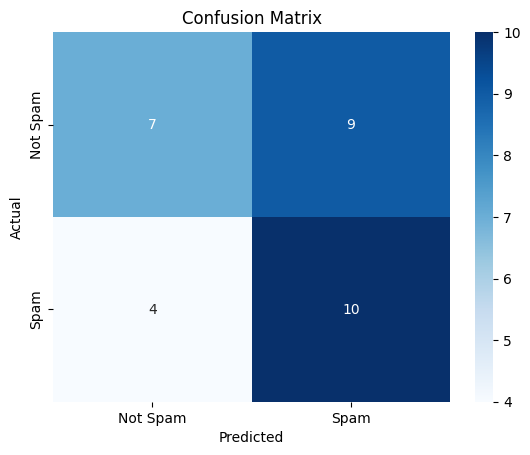


-------------------------------------------------------------------------------------------------------------------------------------------------------------

Top 10 Feature Importance Table:
   Importance                              Feature
0    0.083096                    sender_reputation
1    0.043281              word_to_character_ratio
2    0.014804                     suspicious_links
3    0.013909      header.from_user505@example.com
4    0.012882      header.from_user113@example.com
5    0.010869   header.to_recipient605@example.com
6    0.010296      header.from_user810@example.com
7    0.010035  header.subject_RpyTlKCv9XNQ6dia6xf7
8    0.009948   header.to_recipient433@example.com
9    0.008810  header.subject_nHMw5cm5 Fa4diT8N2A3


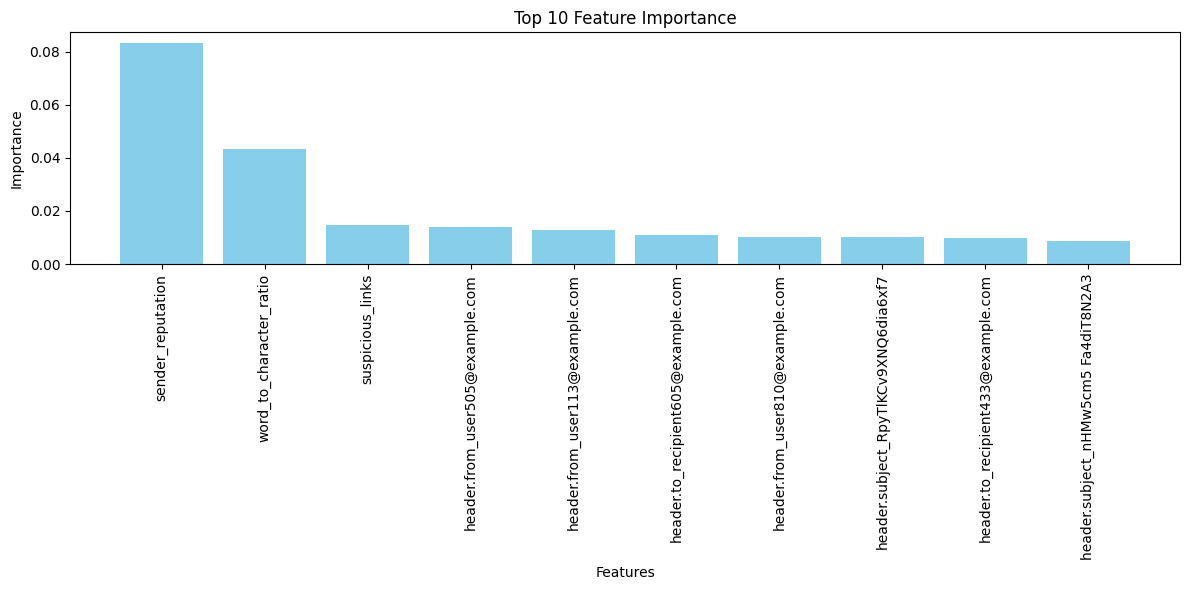


-------------------------------------------------------------------------------------------------------------------------------------------------------------





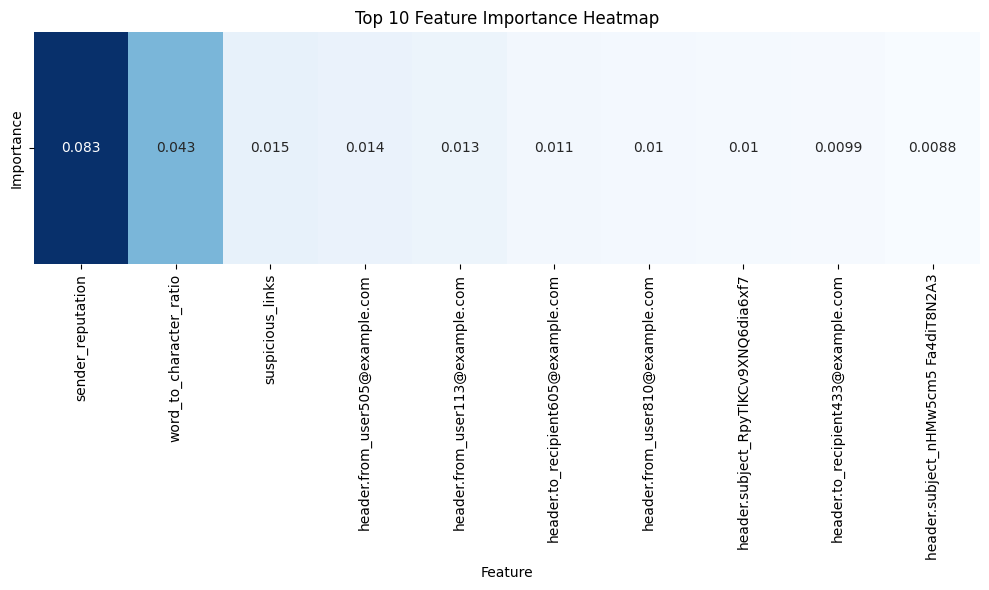

In [ ]:
def main():
    json_file = "Dataset2.json"

    # Step 1: Load and print the table
    df = load_and_print_table(json_file)
    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

    # Step 2: Clean the data
    df_cleaned = clean_data(df)

    # Separate features and target
    if "label_spam" in df_cleaned.columns:
        X = df_cleaned.drop("label_spam", axis=1)
        y = df_cleaned["label_spam"]
    else:
        raise KeyError("The target column 'label_spam' is missing in the dataset.")

    # Step 3: Standardize the data
    X_scaled = stand_data(X)

    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Step 4: Train the model
    model = train_model(X_train, y_train)
    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

    # Step 5: Evaluate the model
    # Assuming evaluate_model returns y_pred
    y_pred = evaluate_model(model, X_test, y_test)
    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

    # Step 6: Plot confusion matrix heatmap
    plot_confusion_matrix(y_test, y_pred)
    print("\n-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

    # Step 7: Feature importance
    plot_feature_importance(model, X.columns)


main()
